# Predict the critical temperature of superconductors using Linear Regression

##### Data contains 81 physical properties of the superconductors as well as their critical temperature as target feature. The main goal is to train a model to predict this target feature for superconductors given their physical properties.
##### data from:   https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data 

### Importing essential libraries for data import and analysis

In [26]:
#import essential libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Data Preprocessing

In [27]:
#read data frame csv file as a data frame
df = pd.read_csv("train.csv")

In [28]:
#show the head of the data frame
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [30]:
#show information about the data frame including data type, column names, number of columns,...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [34]:
#list the column names of a data frame:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [35]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [36]:
df.drop('critical_temp',axis=1)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


### investigate the correlation between the features

In [37]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df_corr = df.corr()

In [38]:
#show the head of the data frame (here correlated data frame):
df_corr.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858


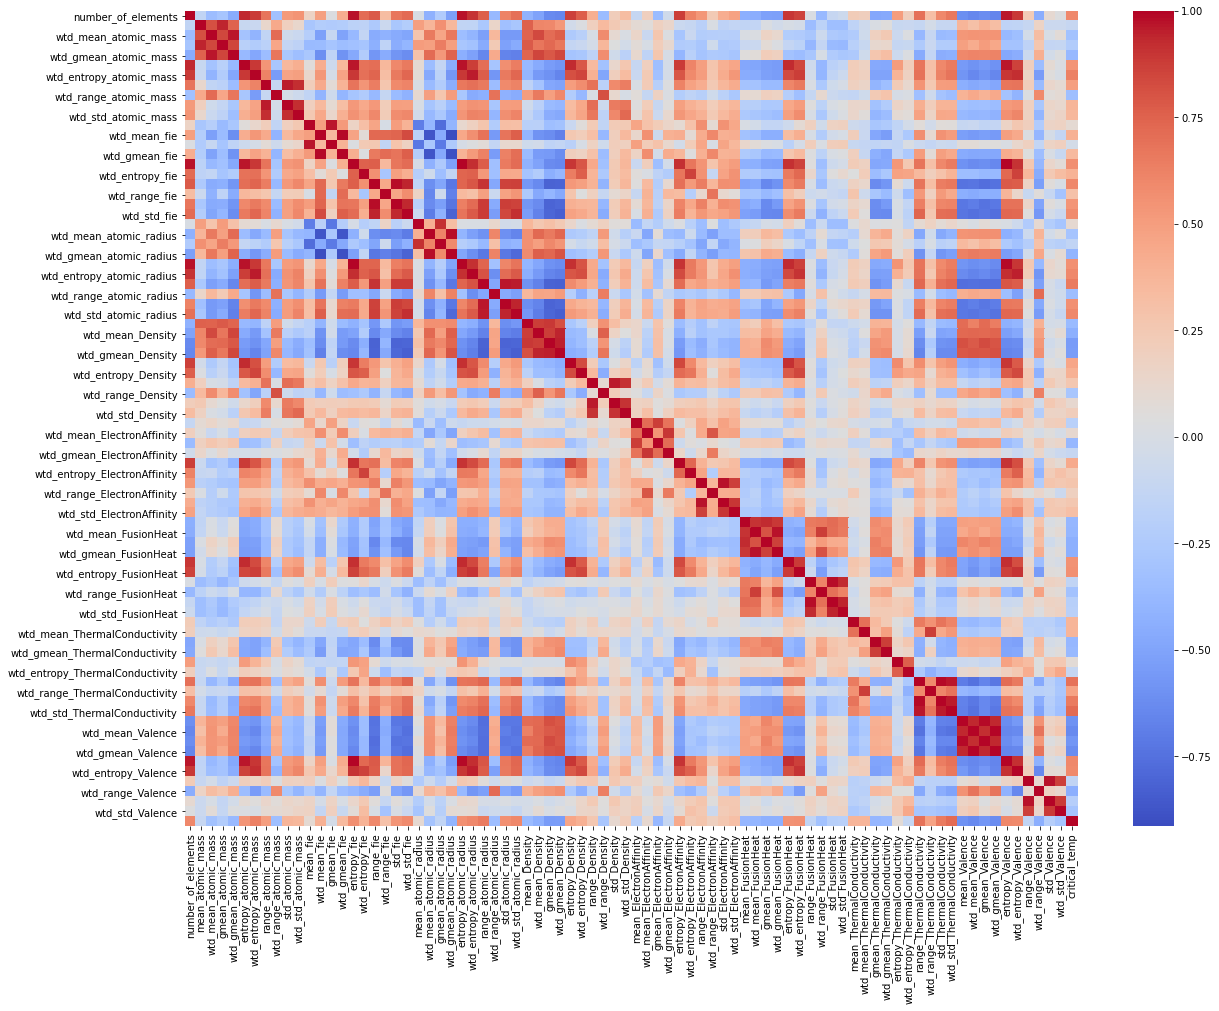

In [85]:
#plot correlation of the features of the data frame:
#define the size of the plot:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')

In [40]:
#list the total number of null values in each column:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [41]:
#list five highest count value of the critical temperature:
df['critical_temp'].value_counts().head(10)

80.0    143
20.0    129
30.0    125
90.0    122
40.0    111
32.0    104
35.0    102
92.0    101
15.0     99
25.0     96
Name: critical_temp, dtype: int64

In [42]:
min = df['critical_temp'].min()
max = df['critical_temp'].max()
print(min)
print(max)

0.00021
185.0


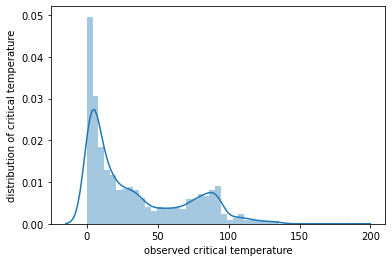

In [43]:
#plot the distribution of target feature (critical_temp) in the dataset:
plot = sns.distplot(df.critical_temp.values)
plot.set(xlabel='observed critical temperature', ylabel='distribution of critical temperature')
plt.show()

## Machine Learning

### import libraries from scikit-learn to split data into train and test sets

In [44]:
from sklearn.model_selection import train_test_split

### define object and featues in the data frame:

In [ ]:
X = df.drop('critical_temp',axis=1).values
y = df['critical_temp'].values

### Splitting the data set to training and test data set those will be used for the model training and testing:

In [46]:
#split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Features Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### define, fit and test the model

In [47]:
#import the model linear regression from scikit-learn library to perform data training and prediction:
from sklearn.linear_model import LinearRegression

In [48]:
#define the model (estimator)
lm = LinearRegression()

In [49]:
#fit model to the training set of data:
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
#use the model to predict the object value for the test set of data:
y_predicted=lm.predict(X_test)

In [51]:
#print the coefficient of the line fit to the data using linear regression:
print('model line intercept:',lm.intercept_)

model line intercept: -20.909059361604925


In [52]:
coeff_df = pd.DataFrame(lm.coef_,columns=['Coefficient'])

In [53]:
coeff_df

,Coefficient
0,-3.152569
1,0.870415
2,-0.924989
3,-0.531806
4,0.665018
...,...
76,-65.397983
77,5.296553
78,-0.563351
79,6.099029


In [54]:
#import required metrics from scikit-learn to calculate the MAE, MSE, RMSE of the predictions:
from sklearn import metrics

In [55]:
#print the calculated MAE, MSE, RMSE (comparing the TRUE value and predicted ones):
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 13.424386657892027
MSE: 315.54230239298516
RMSE: 17.76351041863587


In [56]:
#use model to predict object value for all data set
prediction_all = lm.predict(X)

In [57]:
prediction_all

array([31.11421288, 39.67360304, 26.56224956, ..., -5.54569944,
       -3.44204955,  7.06273919])

In [58]:
#print the coefficient of the line fit to the data using linear regression:
print('intercept:',lm.intercept_)

intercept: -20.909059361604925


In [59]:
#make a new data frame with one new column (predicted object valued for all data set)
#comparing to the old data frame
df_prediction = pd.DataFrame(prediction_all,columns=['predicted t'])

In [60]:
#show the head of the recently created data frame:
df_prediction.head()

,predicted t
0,31.114213
1,39.673603
2,26.562250
3,28.976660
4,34.788918


#### Improving the data frame by adding the data (such as name of the materials) those are useful for get the model prediction but not useful for model training:

In [61]:
#read data from additional data file as another data frame:
df_formula = pd.read_csv("unique_m.csv")

In [62]:
#show the head of the recently created data frame:
df_formula.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [63]:
#add one column of a data frame (df_formula) to another data frame (df) and make a new data frame
#(df_with_formula) out of that:
df_with_formula = pd.concat([df,df_formula['material']],axis=1)

In [64]:
#show the head of the new created data frame:
df_with_formula.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0,Ba0.3La1.7Cu1O4


In [65]:
#add data frame (df_prediction) to another data frame (df_with_formula)
#to create a new data frame (df_formula_prediction)
df_formula_prediction = pd.concat([df_with_formula,df_prediction],axis=1)

In [68]:
#show the head of the new created data frame:
df_formula_prediction.head(20)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material,predicted t
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0,Ba0.2La1.8Cu1O4,31.114213
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0,Ba0.1La1.9Ag0.1Cu0.9O4,39.673603
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0,Ba0.1La1.9Cu1O4,26.562250
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0,Ba0.15La1.85Cu1O4,28.976660
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0,Ba0.3La1.7Cu1O4,34.788918
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0,Ba0.5La1.5Cu1O4,40.580757
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0,Ba1La1Cu1O4,48.015926
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0,Sr0.1La1.9Cu1O4,21.519781
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0,Sr0.15La1.85Cu1O4,24.194789
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0,Sr0.2La1.8Cu1O4,26.612072


### Predicting the critical temperature of the material:

In [78]:
#giving the name of the material and get the predicted critical temperature:

df_formula_prediction[df_formula_prediction['material']=='Ba1La1Cu1O4']['predicted t'].item()

48.015925713252706

### visualizing the comparison between model predicted and observed target feature (critical temperature):

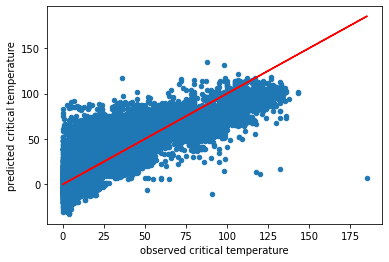

In [150]:
#plot the scatter plot of the predicted value (all data set) versus True values of the object
p_o_plot = df_formula_prediction.plot(x='critical_temp', y='predicted t', kind='scatter')
p_o_plot.set(xlabel='observed critical temperature', ylabel='predicted critical temperature')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color = 'r')
plt.show()

In [153]:
df_formula_prediction[df_formula_prediction.iloc[:,81]>175]

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material,predicted t
20573,2,16.53647,11.360293,5.685033,3.193745,0.136394,0.224622,31.05706,10.016373,15.52853,...,1.817121,0.410116,0.562335,5,1.333333,2.5,2.357023,185.0,H2S1,7.381542


### Conslusion

distrinution of predicted vs observed critical temperature shows that linear regression can predict the target feature not bad. However, there are few materials specificaly one with high temperature (H2S) which falls off from the line. Trying more complicated method like ANN and XGBOOST may improve this distribution and make better predictions.